# Sentiment Analysis 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
data = pd.read_csv('C:/Users/Hiren/Desktop/IMDB Dataset.csv')

In [37]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [38]:
data['sentiment'] = data['sentiment'].replace({'negative':0,'positive':1})

In [39]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


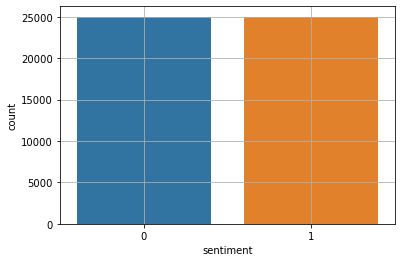

In [40]:
sns.countplot(x=data['sentiment'])
plt.grid()

In [41]:
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hiren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
data2 = data.drop(range(7000,50000))

In [76]:
data2.count()

review       7000
sentiment    7000
dtype: int64

## Text Processing

In [77]:
data2['review'][0]
review = re.sub('[^a-zA-Z]', ' ', data2['review'][0]) # only keep the letters so what we dont want to remove
review = review.lower() # make all letters as lowercase 
review = review.split()  # split the review into separate words to create a list of words
ps =PorterStemmer()
review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))] # use set for larger text
review = ' '.join(review) # take the list of words back into the string

In [78]:
review

'one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch da

In [80]:
# For all the reviews in the dataset using the for loop
corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 7000):
    review = re.sub('[^a-zA-Z]', ' ', data2['review'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [81]:
corpus[5]

'probabl time favorit movi stori selfless sacrific dedic nobl caus preachi bore never get old despit seen time last year paul luka perform bring tear eye bett davi one truli sympathet role delight kid grandma say like dress midget children make fun watch mother slow awaken happen world roof believ startl dozen thumb movi'

## Feature Extraction
### Bag of Words Model 

In [82]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)# We restrict the words to 1500 which keeps the most frequent words

In [83]:
X = cv.fit_transform(corpus).toarray()# independent variables

In [84]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [85]:
print(cv.get_feature_names())


['abil', 'abl', 'absolut', 'absurd', 'abus', 'academi', 'accent', 'accept', 'accid', 'achiev', 'across', 'act', 'action', 'actor', 'actress', 'actual', 'ad', 'adam', 'adapt', 'add', 'addit', 'admir', 'admit', 'adult', 'adventur', 'affair', 'affect', 'afraid', 'african', 'age', 'agent', 'ago', 'agre', 'ahead', 'air', 'al', 'alien', 'aliv', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'although', 'alway', 'amaz', 'america', 'american', 'among', 'amount', 'amus', 'angel', 'angl', 'angri', 'anim', 'ann', 'annoy', 'anoth', 'answer', 'anti', 'anymor', 'anyon', 'anyth', 'anyway', 'apart', 'appar', 'appeal', 'appear', 'appreci', 'approach', 'area', 'arm', 'armi', 'around', 'arriv', 'art', 'artist', 'asid', 'ask', 'aspect', 'assum', 'atmospher', 'attack', 'attempt', 'attent', 'attitud', 'attract', 'audienc', 'author', 'avail', 'averag', 'avoid', 'aw', 'award', 'away', 'awesom', 'babi', 'back', 'background', 'bad', 'badli', 'ball', 'band', 'bar', 'bare', 'base', 'basic', 'batman', 'bat

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [86]:
X.shape

(7000, 1500)

In [87]:
y = data2.iloc[:, 1].values # dependent variable 

In [88]:
y.shape


(7000,)

# Modeling
## Naive Bayes Model

In [89]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Evaluate the results
confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7764285714285715

## KNN Model

In [90]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Evaluate the results
accuracy_score(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7171428571428572

## Support Vector Machine SVM Model

In [91]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = clf.fit(X_train, y_train).predict(X_test)
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Evaluate the results
confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8464285714285714

## Decision Tree Classification Model

In [92]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Evaluate the results
accuracy_score(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7171428571428572

## Random Forest Model

In [93]:
 #Splitting the dataset into the Training set and Test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Evaluate the results
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7742857142857142

## Feature Extraction
### TF IDF

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [95]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [96]:
X =corpus

In [97]:
X.shape

(7000, 2500)

# Modeling
## Random Forest Model

In [98]:
#Splitting the dataset into the Training set and Test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Evaluate the results
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7721428571428571

## Decision Tree Model

In [99]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Evaluate the results
accuracy_score(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7017142857142857

## Support Vector Machine SVM Model

In [100]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = clf.fit(X_train, y_train).predict(X_test)
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Evaluate the results
confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8778571428571429

## KNN Model 

In [101]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p =2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 

y_pred = classifier.predict(X_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Evaluate the results
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7028571428571428

## Naive Bayes Model

In [102]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Evaluate the results
confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7957142857142857

### Performance of all implemented model 

In [105]:
from tabulate import tabulate

data_bag_of_words = [["Bag_of_words_Random Forest Model", 0.7742857142857142], 
        ["Bag_of_words_Decision Tree", 0.7171428571428572], 
        ["Bag_of_words_SVM", 0.8464285714285714], 
        ["Bag_of_words_KNN", 0.7171428571428572],
        ["Bag_of_words_Naive Bayes", 0.7764285714285715]]

col_names = ["Model_Name", "Accuracy"]

print(tabulate(data_bag_of_words, headers=col_names, tablefmt="grid", showindex="always"))

+----+----------------------------------+------------+
|    | Model_Name                       |   Accuracy |
+====+==================================+============+
|  0 | Bag_of_words_Random Forest Model |   0.774286 |
+----+----------------------------------+------------+
|  1 | Bag_of_words_Decision Tree       |   0.717143 |
+----+----------------------------------+------------+
|  2 | Bag_of_words_SVM                 |   0.846429 |
+----+----------------------------------+------------+
|  3 | Bag_of_words_KNN                 |   0.717143 |
+----+----------------------------------+------------+
|  4 | Bag_of_words_Naive Bayes         |   0.776429 |
+----+----------------------------------+------------+


In [106]:
from tabulate import tabulate

data_TF_IDF = [["TF_IDF_Random Forest Model", 0.7721428571428571], 
        ["TF_IDF_Bag_of_words_Decision Tree", 0.7017142857142857], 
        ["TF_IDF_Bag_of_words_SVM", 0.8778571428571429], 
        ["TF_IDF_Bag_of_words_KNN", 0.7028571428571428],
        ["TF_IDF_Bag_of_words_Naive Bayes", 0.7957142857142857]]

col_names = ["Model_Name", "Accuracy"]

print(tabulate(data_TF_IDF, headers=col_names, tablefmt="grid", showindex="always"))

+----+-----------------------------------+------------+
|    | Model_Name                        |   Accuracy |
+====+===================================+============+
|  0 | TF_IDF_Random Forest Model        |   0.772143 |
+----+-----------------------------------+------------+
|  1 | TF_IDF_Bag_of_words_Decision Tree |   0.701714 |
+----+-----------------------------------+------------+
|  2 | TF_IDF_Bag_of_words_SVM           |   0.877857 |
+----+-----------------------------------+------------+
|  3 | TF_IDF_Bag_of_words_KNN           |   0.702857 |
+----+-----------------------------------+------------+
|  4 | TF_IDF_Bag_of_words_Naive Bayes   |   0.795714 |
+----+-----------------------------------+------------+
